Binary Data: [0 1 0 0 0 1 0 0 0 1]


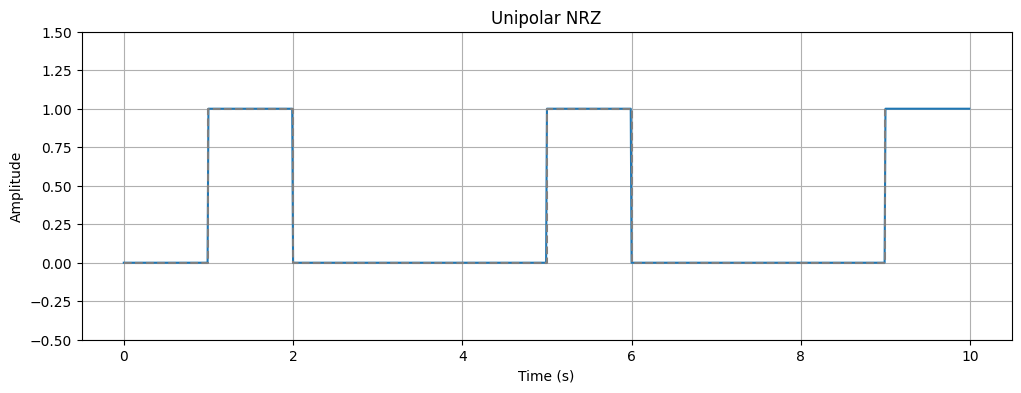

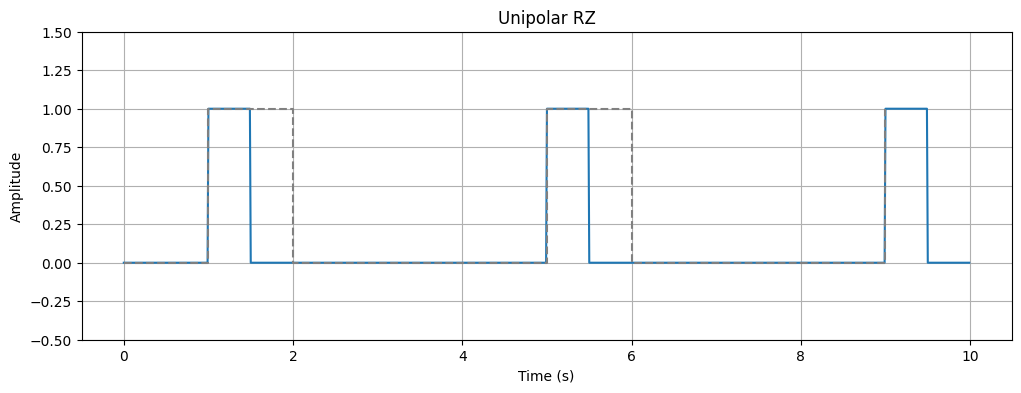

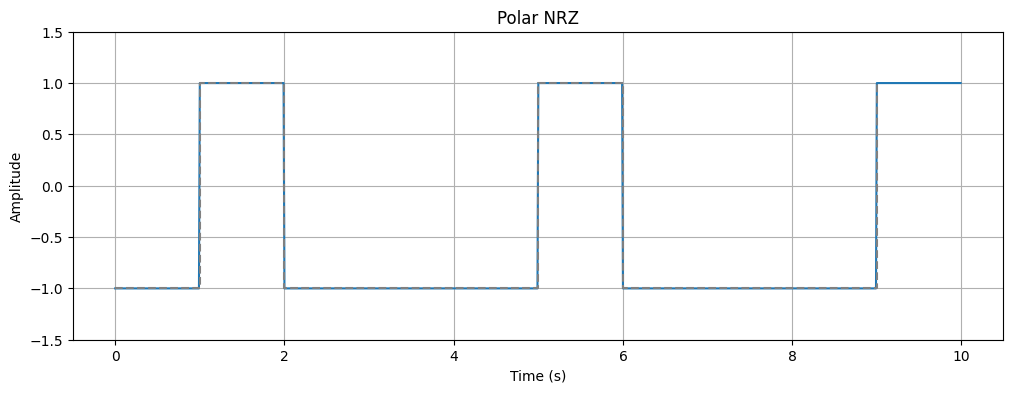

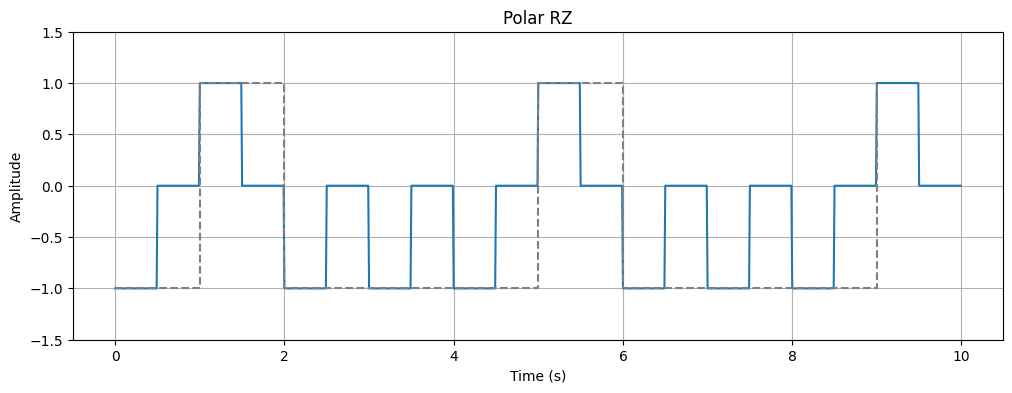

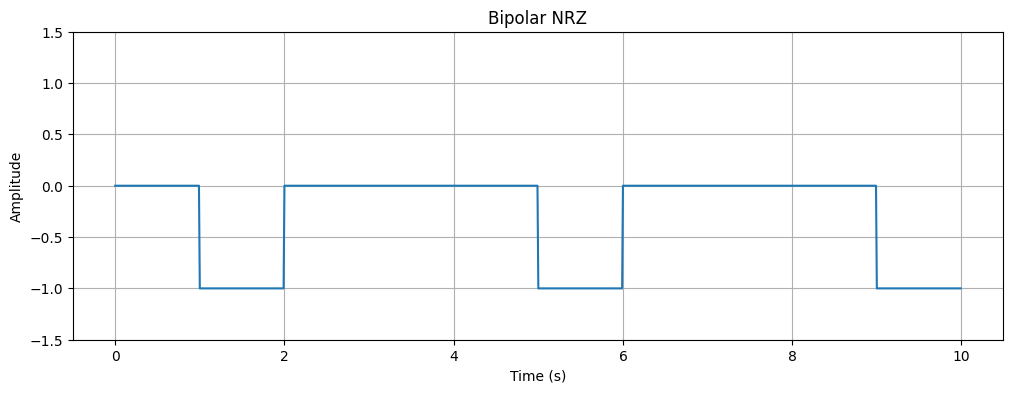

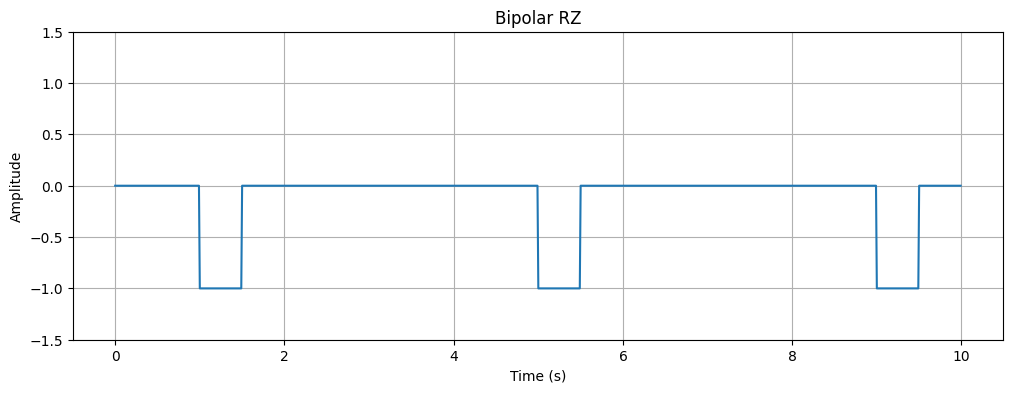

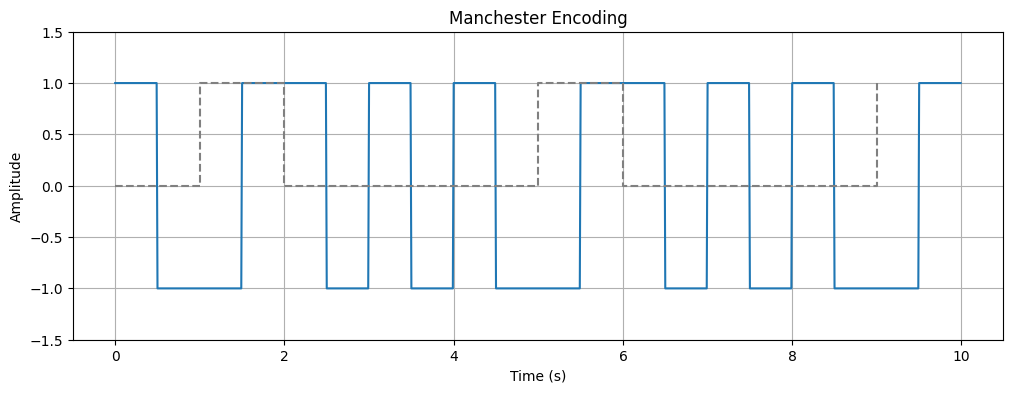

In [2]:
import numpy as np

import matplotlib.pyplot as plt


# Basic parameters
bit_rate = 1
points = 100
Tb = 1 / bit_rate


np.random.seed(42)
data = np.random.randint(0, 2, 10)
print("Binary Data:", data)


def plot_signal(t, s, title, ylim=(-1.5, 1.5), ref=None):
    plt.figure(figsize=(12,4))
    plt.plot(t, s)
    if ref is not None:
        plt.step(np.arange(len(data))*Tb, ref, where='post', ls='--', c='gray')
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.ylim(*ylim)
    plt.show()


def encode(data, func):
    t = np.linspace(0, len(data)*Tb, len(data)*points, endpoint=False)
    s = np.zeros(len(t))
    for i, b in enumerate(data):
        s[i*points:(i+1)*points] = func(b, i)
    return t, s


# 1. Unipolar NRZ
t, s = encode(data, lambda b,i: b)
plot_signal(t, s, "Unipolar NRZ", (-0.5, 1.5), data)


# 2. Unipolar RZ
def unipolar_rz(b, i):
    x = np.zeros(points)
    x[:points//2] = b
    return x
s = np.concatenate([unipolar_rz(b,i) for i,b in enumerate(data)])
t = np.linspace(0,len(data)*Tb,len(data)*points,endpoint=False)
plot_signal(t, s, "Unipolar RZ", (-0.5, 1.5), data)


# 3. Polar NRZ
t, s = encode(data, lambda b,i: 1 if b else -1)
plot_signal(t, s, "Polar NRZ", (-1.5, 1.5), data*2-1)


# 4. Polar RZ
def polar_rz(b,i):
    x = np.zeros(points)
    x[:points//2] = 1 if b else -1
    return x
s = np.concatenate([polar_rz(b,i) for i,b in enumerate(data)])
plot_signal(t, s, "Polar RZ", (-1.5, 1.5), data*2-1)

# 5. Bipolar NRZ
def bipolar_nrz(b,i):
    return 1 if b==1 and i%2==0 else (-1 if b==1 else 0)
t, s = encode(data, bipolar_nrz)
plot_signal(t, s, "Bipolar NRZ", (-1.5, 1.5), None)
# 6. Bipolar RZ
def bipolar_rz(b,i):
    x = np.zeros(points)
    if b == 1:
        x[:points//2] = 1 if i%2==0 else -1
    return x
s = np.concatenate([bipolar_rz(b,i) for i,b in enumerate(data)])
plot_signal(t, s, "Bipolar RZ", (-1.5, 1.5), None)
# 7. Manchester
def manchester(b,i):
    return np.r_[1,-1] if b==0 else np.r_[-1,1]
s = np.concatenate([np.repeat(manchester(b,i), points//2) for i,b in enumerate(data)])
plot_signal(t, s, "Manchester Encoding", (-1.5, 1.5), data)